In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


class Model(nn.Module):
  def __init__(self, in_features= 20 , h1= 50  , h2= 50 , h3 = 25 ,  out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)

    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))

    x = self.out(x)

    return x


torch.manual_seed(42)
model = Model()



data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)


data_ST_list = np.array(data_ST_list)
data_ST = np.resize(data_ST_list,(5000,5000))

data_ST_ = []
for i in range(data_ST.shape[0]):
    data_ST_.append(data_ST[i][0:20])

data_ST_ = np.array(data_ST_)


del data_ST, data_ST_list





data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)


data_SB_list = np.array(data_SB_list)
data_SB = np.resize(data_SB_list,(5000,5000))

data_SB_ = []
for i in range(data_SB.shape[0]):
    data_SB_.append(data_SB[i][0:20])

data_SB_ = np.array(data_SB_)


del data_SB, data_SB_list




data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)


data_SR_list = np.array(data_SR_list)
data_SR = np.resize(data_SR_list,(5000,5000))

data_SR_ = []
for i in range(data_SR.shape[0]):
    data_SR_.append(data_SR[i][0:20])

data_SR_ = np.array(data_SR_)


del data_SR, data_SR_list



data_ST_train = []
data_SR_train = []
data_SB_train = []

for i in range(2500):
    data_SB_train.append(data_SB_[i])
    data_SR_train.append(data_SR_[i])
    data_ST_train.append(data_ST_[i])



data_ST_test = []
data_SR_test = []
data_SB_test = []

for i in range(3000,4000):
    data_SB_test.append(data_SB_[i])
    data_SR_test.append(data_SR_[i])
    data_ST_test.append(data_ST_[i])


data_train = data_SB_train + data_SR_train + data_ST_train
data_test = data_SB_test + data_SR_test + data_ST_test


del data_SB_train, data_SR_train, data_ST_train
del data_SB_test, data_SR_test, data_ST_test



label_train = []
for i in range(2500):
    label_train.append(1)

for i in range(2500):
    label_train.append(2)

for i in range(2500):
    label_train.append(3)

label_train = np.array(label_train)




In [ ]:
data_train = torch.FloatTensor(data_train)
label_train = torch.LongTensor(label_train)

data_test = torch.FloatTensor(data_test)
label_test = torch.LongTensor(label_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []
for i in range(epochs):
  
  y_pred = model.forward(data_train) 

  loss = criterion(y_pred, label_train) 

  losses.append(loss.detach().numpy())

  # if i % 10 == 0:
  print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')





In [ ]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
    y_eval = model.forward(data_test) # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, label_test) # Find the loss or error

print(f'loss : {loss}')


In [17]:
label_test = []
for i in range(1000):
    label_test.append(1)

for i in range(1000):
    label_test.append(2)

for i in range(1000):
    label_test.append(3)

label_test = np.array(label_test)


In [18]:
torch.save(model.state_dict(), 'model_1.pt')
new_model = Model()
new_model.load_state_dict(torch.load('model_1.pt'))

tensor(0.1315)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(data_test):
    y_val = model.forward(data)

    if label_test[i] == 0:
      x = "Setosa"
    elif label_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.)  tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.)  tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.)  tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.)  tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.)  tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.)  ten

In [20]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [21]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [22]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [23]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [24]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [25]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [26]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

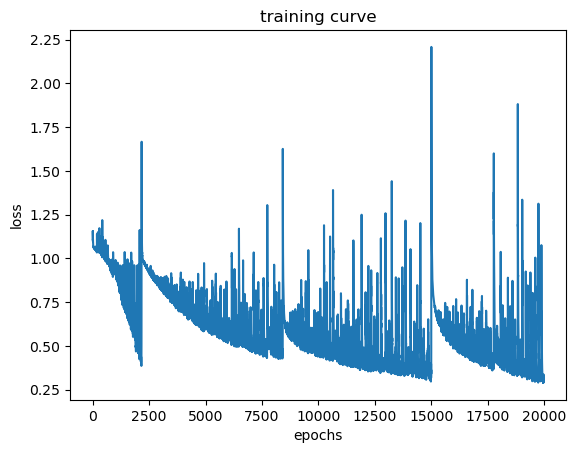

In [48]:
import matplotlib.pyplot as plt

url = '/home/pingal/Downloads/loss_model_4.txt'

cc = np.loadtxt(url)
plt.plot(cc[10:])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training curve')

plt.savefig('training_curve.png')